In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#import graphviz
import pyarrow

from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

sns.set_style("white")
plt.rcParams['figure.dpi'] = 300

In [7]:
eng_stats_df = pd.read_feather("Award_Batting_HOF_FE.feather")

In [8]:
# X = eng_stats_df[['Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_avg', 'Batting_df_AB_total', 'Batting_df_R_avg', 'Batting_df_R_total', 'Batting_df_H_avg', 'Batting_df_H_total', 'Batting_df_2B_avg', 'Batting_df_2B_total', 'Batting_df_3B_avg', 'Batting_df_3B_total', 'Batting_df_HR_avg', 'Batting_df_HR_total', 'Batting_df_RBI_avg', 'Batting_df_RBI_total', 'Batting_df_SB_avg', 'Batting_df_SB_total', 'Batting_df_CS_avg', 'Batting_df_CS_total', 'Batting_df_BB_avg', 'Batting_df_BB_total', 'Batting_df_SO_avg', 'Batting_df_SO_total', 'Batting_df_IBB_avg', 'Batting_df_IBB_total', 'Batting_df_HBP_avg', 'Batting_df_HBP_total', 'Batting_df_SH_avg', 'Batting_df_SH_total', 'Batting_df_SF_avg', 'Batting_df_SF_total', 'Batting_df_GIDP_avg', 'Batting_df_GIDP_total', 'BattingPost_df_G_avg', 'BattingPost_df_G_total', 'BattingPost_df_AB_avg', 'BattingPost_df_AB_total', 'BattingPost_df_R_avg', 'BattingPost_df_R_total', 'BattingPost_df_H_avg', 'BattingPost_df_H_total', 'BattingPost_df_2B_avg', 'BattingPost_df_2B_total', 'BattingPost_df_3B_avg', 'BattingPost_df_3B_total', 'BattingPost_df_HR_avg', 'BattingPost_df_HR_total', 'BattingPost_df_RBI_avg', 'BattingPost_df_RBI_total', 'BattingPost_df_SB_avg', 'BattingPost_df_SB_total', 'BattingPost_df_CS_avg', 'BattingPost_df_CS_total', 'BattingPost_df_BB_avg', 'BattingPost_df_BB_total', 'BattingPost_df_SO_avg', 'BattingPost_df_SO_total', 'BattingPost_df_IBB_avg', 'BattingPost_df_IBB_total', 'BattingPost_df_HBP_avg', 'BattingPost_df_HBP_total', 'BattingPost_df_SH_avg', 'BattingPost_df_SH_total', 'BattingPost_df_SF_avg', 'BattingPost_df_SF_total', 'BattingPost_df_GIDP_avg', 'BattingPost_df_GIDP_total']]

feature_columns = [
    'total_games', 'total_at_bats', 'total_runs', 'total_hits',
    'total_doubles', 'total_triples', 'total_home_runs', 'total_RBI',
    'total_SB', 'total_CS', 'total_BB', 'total_SO', 'total_IBB',
    'total_HBP', 'total_SH', 'total_SF', 'total_GIDP', 'max_HR',
    'max_hits', 'max_SB'
]

X = eng_stats_df[feature_columns]
y = eng_stats_df['HOF_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rfr_model_1 = RandomForestRegressor()
rfr_model_1.fit(X_train_scaled, y_train)

y_pred = rfr_model_1.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%')

Mean Squared Error: 0.0031299619168037485
R-squared: 0.7526271631716004
Root Mean Squared Error (RMSE): 0.055946062567474295
Mean Absolute Percentage Error (MAPE): 1571750257135711.50%


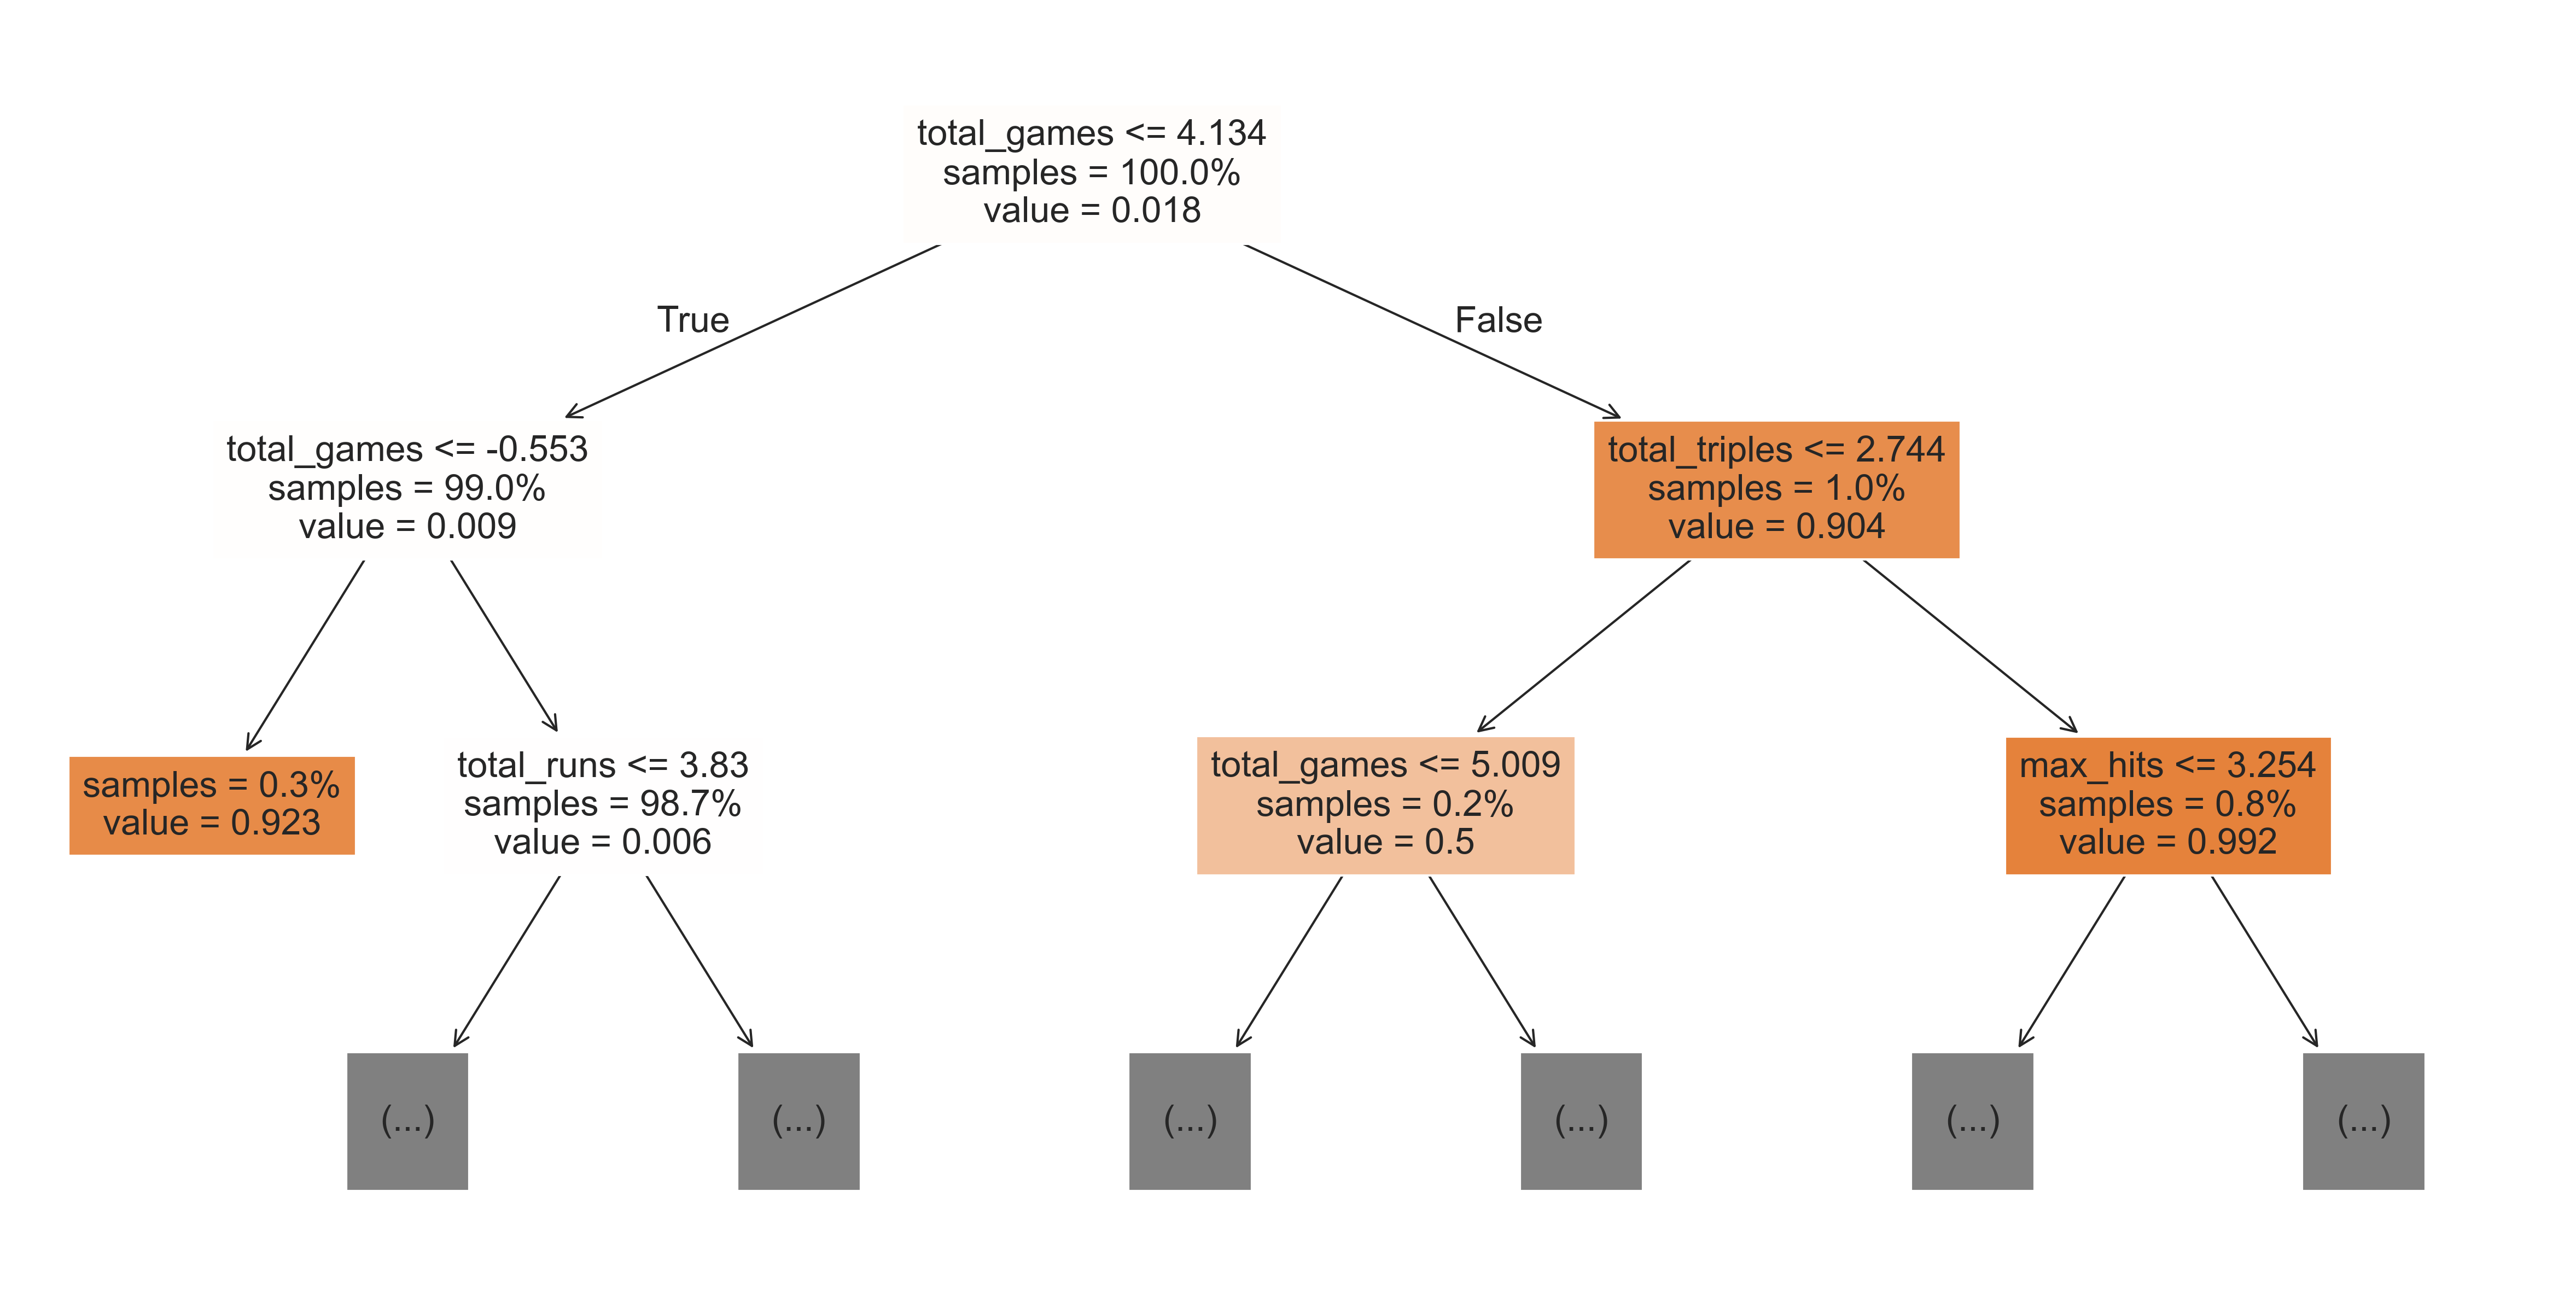

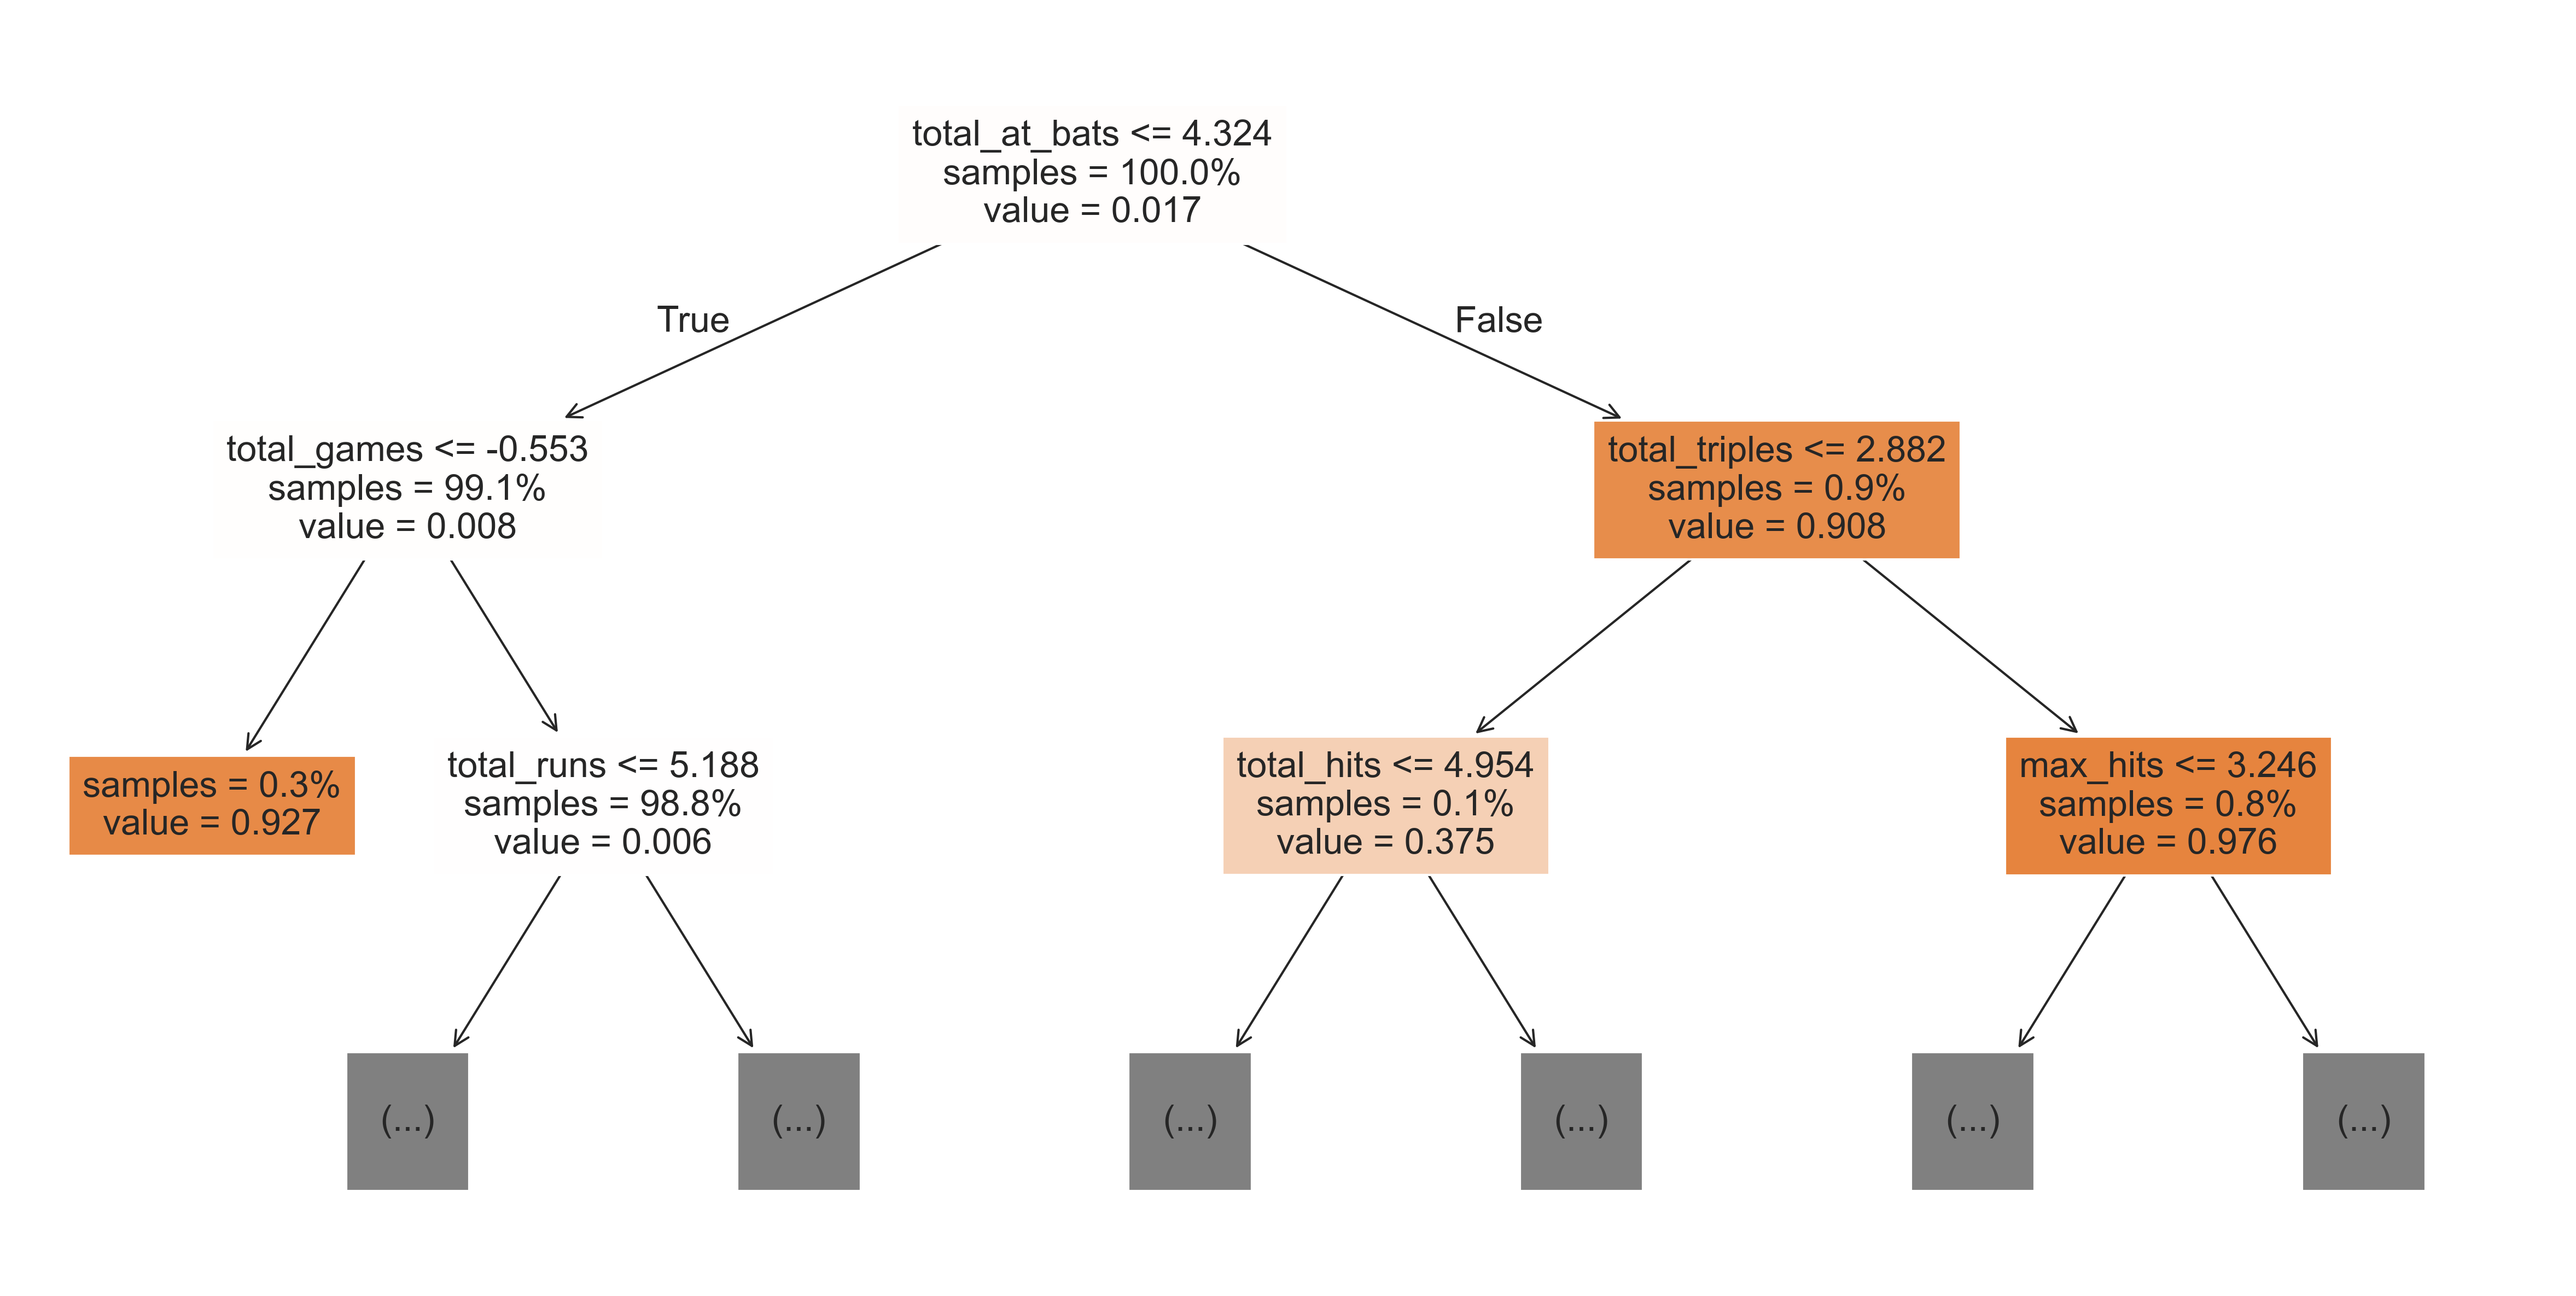

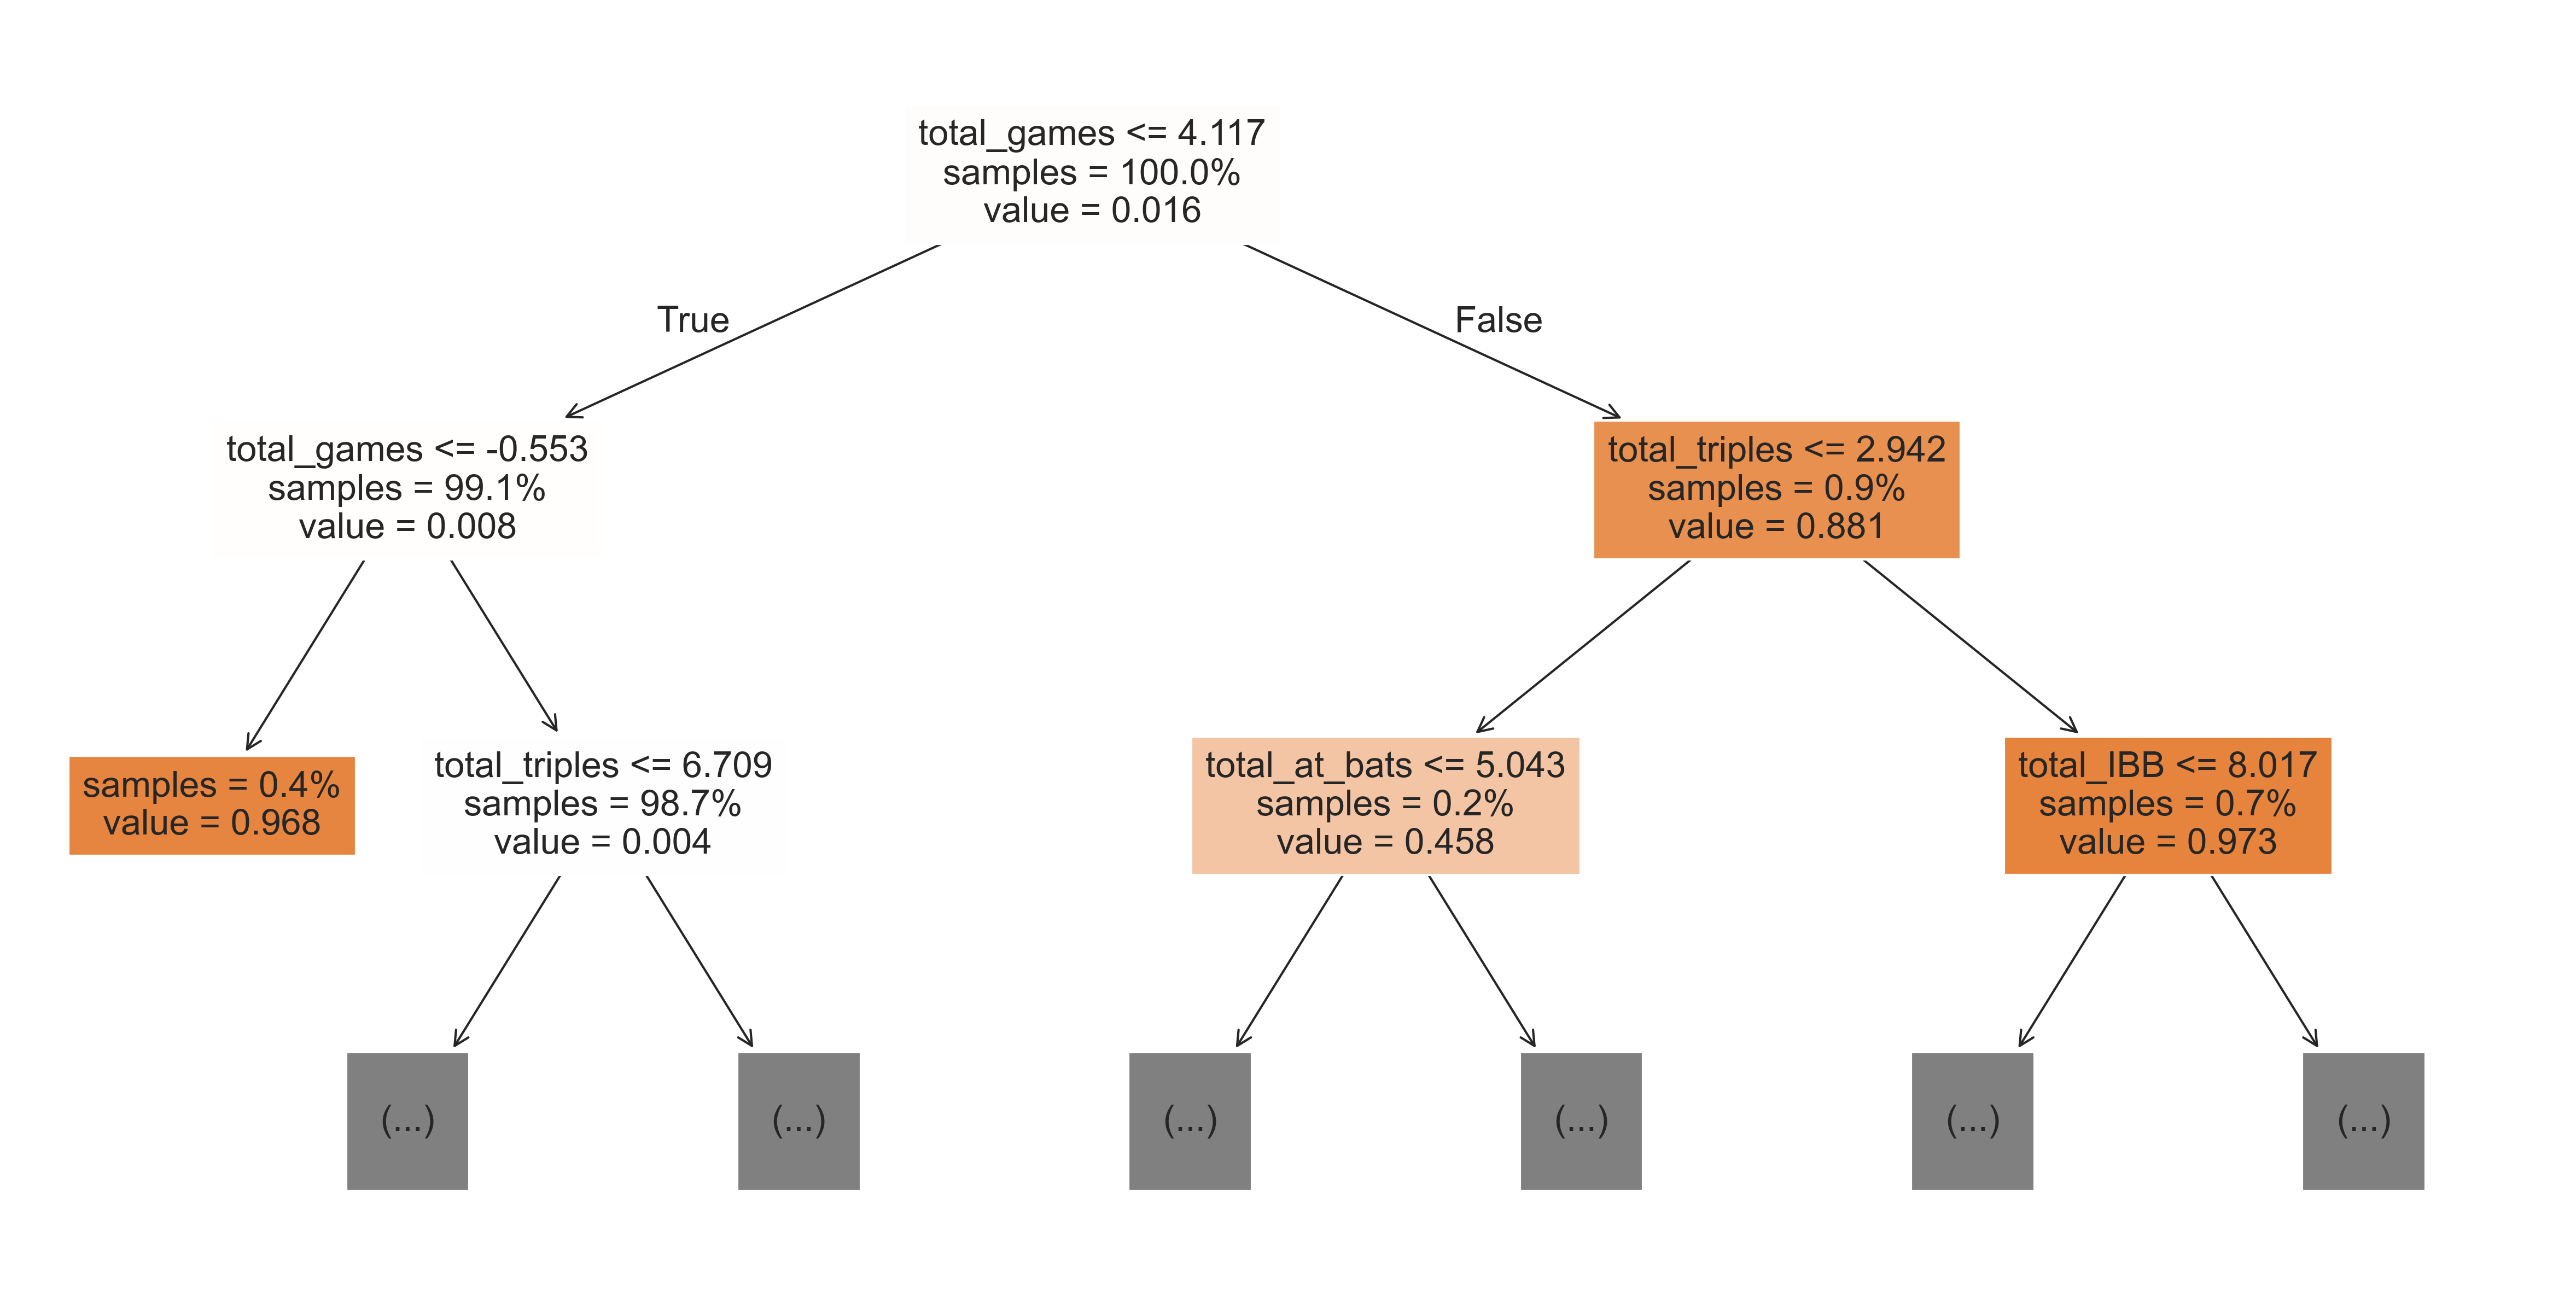

In [9]:
from sklearn.tree import plot_tree


# Visualize individual trees
for i in range(3):
    tree = rfr_model_1.estimators_[i]
    plt.figure(figsize=(20, 10))
    plot_tree(tree, feature_names=feature_columns, filled=True, max_depth=2, impurity=False, proportion=True)
    plt.show()


In [10]:
feature_importances = pd.Series(rfr_model_1.feature_importances_, X.columns)
top_rfr_features = feature_importances.nlargest(15)
print(top_rfr_features)

total_games        0.408455
total_hits         0.127374
total_runs         0.107302
total_at_bats      0.092298
max_hits           0.092284
total_SH           0.025467
total_triples      0.025445
total_RBI          0.019458
total_BB           0.012845
total_SO           0.012327
total_doubles      0.010595
total_home_runs    0.009473
max_SB             0.009087
total_IBB          0.008465
max_HR             0.007655
dtype: float64
